# Instrucciones

El laboratorio tiene 6 ptos, donde obtener 6 ptos equivale a un 7.0 y 0 ptos a 1.0. 

El formato de entrega será subir a u-cursos un Jupyter notebook
laboratorio1.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo
una celda markdown antes de cada celda de código. 



## 1. Implementar la clase MyMatrix  (3 ptos)

En esta sección usted deberá crear:
1. Una clase MyMatrix que sirva para almacenar matrices.
2. Implementar los métodos descritos y abajo y testearlos.

Debe utilizar sólo la estructura de datos de Python por defecto (no usar liberías ni herencia).

class MyMatrix:<br> 

    def __init__(self, x): 
        #Método para instanciar un objeto clase matriz. Debe entregar una excepción si el número de columnas de cada fila no es el mismo.
    
    def __str__(self): 
        #Método print. Imprime en pantalla la matriz.
        
     def getitem(self, row, col): 
        #Método para indexar. Retorna un elemeno de la matriz en una posición específica.
        
    def __len__(self): 
        #Método para calcular el largo de una matriz = número de filas.
        
    def shape(self): 
        #Método para calcular la dimensión de una matriz. Retorna una tupla de la forma (n_filas, n_columnas).
    
    def __add__(self, other): 
        #Método para sumar matrices del mismo tamaño. Debe entregar una excepción si se intenta sumar matrices de diferente tamaño.
        
    def __sub__(self, other): 
        #Método para restar matrices. Debe entregar una excepción si se intenta restar matrices de diferente tamaño.
        
    def __mul__(self, other): 
        #Método de multiplicación de matrices. Debe entregar una excepción si se intenta multiplicar matrices de tamaño no adecuado para multiplicación matricial.
        
   
    def transpose(self): 
        #Método para transponer una matriz.
        
        
Hint: asuma que la entrada del método init son listas de números de la forma [[1, 2, 3] ] para representar un vector y [[1,2,3], [2,2,2]] para representar una matriz de dos filas y 3 columnas.

In [0]:
class MyMatrix:
    #Supuesto: asuman que la entrada del método init son listas de números de la forma [[]]
    def __init__(self, x):

        m = [len(row) for row in x]
        m = len(set(m))
        if m==1:
            self.matrix = x
        else:
            raise ValueError("El número de columnas de cada fila debe ser el mismo para ser una matriz")
        
    def __str__(self):
        return str(self.matrix)
    
    def getitem(self, row, col):
        return self.matrix[row][col]
    
    def __len__(self):
        return len(self.matrix)
    
    def shape(self):
        m = len(self.matrix)
        n = len(self.matrix[0])
        
        return (m, n)
    
    def __add__(self, other):
        
        if (self.shape() == other.shape()):
            
            m = self.shape()[0]
            n = self.shape()[1]
            C = [[0]*n for i in range(m)]
            
            for i in range(m):
                for j in range(n):
                    C[i][j] = self.getitem(i, j) + other.getitem(i, j)
                    #C[i][j] = self.matrix[i][j] + other.matrix[i][j]
            return MyMatrix(C)
            
        else:
            raise ValueError("Las matrices no tienen la misma dimensión")
            
    def  __sub__(self, other):
        
        if (self.shape() == other.shape()):
            
            m = self.shape()[0]
            n = self.shape()[1]
            C = [[0]*n for i in range(m)]
            
            for i in range(m):
                for j in range(n):
                    C[i][j] = self.getitem(i, j) - other.getitem(i, j)
                    #C[i][j] = self.matrix[i][j] - other.matrix[i][j]
            return MyMatrix(C)
            
        else:
            raise ValueError("Las matrices no tienen la misma dimensión")
    
    def __mul__(self, other):
        r1 = self.shape()[0]
        c1 = self.shape()[1]
        r2 = other.shape()[0]
        c2 = other.shape()[1]
        
        M = [[0]*c2 for i in range(r1)]
        if c1==r2:
            for i in range(r1):
                for j in range(c2):
                    for k in range(c1):
                        M[i][j] += self.getitem(i, k)*other.getitem(k, j)
                        #M[i][j] = M[i][j]+ self.getitem(i, k)*other.getitem(k, j)
            return MyMatrix(M)
            
        else:
            raise ValueError("La dimensión de las matrices no es adecuada para multiplicación matricial")
        
       
    def transpose(self):
        m = self.shape()[0]
        n = self.shape()[1]
        
        T = [[0]*m for i in range(n)]
        
        for i in range(n):
            for j in range(m):
                T[i][j] = self.getitem(j, i)
        return MyMatrix(T)

In [0]:
#Método init
A=MyMatrix([[1,2,3]])
B = MyMatrix([[2,2,2], [3,3,3]])
C = MyMatrix([[1,2], [2,2,3]]) # intento con dimensiones incorrectas

ValueError: ignored

In [0]:
#__str__
print(A)
#__len__
print(len(A))
#shape()
print(A.shape())
#indexamiento
print(A.getitem(0,1))
#suma
print(A+A)
#resta
print(A-A)
#transpuesta
print(A.transpose())
#producto
print(A*A.transpose())

[[1, 2, 3]]
1
(1, 3)
2
[[2, 4, 6]]
[[0, 0, 0]]
[[1], [2], [3]]
[[14]]


### Validaciones

In [0]:
A+B

ValueError: ignored

In [0]:
A-B

ValueError: ignored

In [0]:
A*B

ValueError: ignored

# 2. Obtener todos los intervalos disjuntos entre dos listas (1 ptos)


Obtener todos los intervalos disjuntos entre dos listas, piense en el caso que tenga las fechas de comienzo y de término de cada formación de una persona y desea calcular sus años de estudio superior, por ejemplo una persona pudo empezar su pregrado en 2012 y terminarlo en 2017, comenzar su magíster en 2015 y terminarlo en 2018, finalmente comenzar su doctorado en 2022 y terminarlo en 2026, esto genera las siguientes variables, tiempo_inicio = [2012, 2015, 2022], tiempo_final = [2017, 2018, 2026] y le gustaría obtener la siguiente lista para calcular los años de estudio, merge(ti, tf) = [[2012, 2018], [2022, 2026]].

Realice una prueba con:<br>
ti = [2012, 2015, 2017, 2022, 2026, 2028]<br>
tf = [2017, 2018, 2019, 2026, 2028, 2030]<br>

merge(ti, tf) = [[2012, 2019], [2022 2030]]





def merge(t1, t2): 

    ...

In [0]:
def merge(t1, t2):
    
    intervals = [[t1[i], t2[i]] for i in range(len(t1))] #lista de todos los intervalos
    #setear ptos de partida
    ti = [intervals[0][0]] 
    tf = [intervals[0][1]]
    
    for i in range(1, len(intervals)):
        
        if intervals[i][0]> intervals[i-1][1]:
            ti.append(intervals[i][0])
            tf.append(intervals[i][1])
        
        else:# (intervals[i][0] <= intervals[i-1][1]):
            
            tf[-1] = intervals[i][1]
            
    data = [[ti[i], tf[i]] for i in range(len(ti))]
    
    return data

In [0]:
ti = [2012, 2015, 2017, 2022, 2026, 2028]
tf = [2017, 2018, 2019, 2026, 2028, 2030]
merge(ti, tf)

[[2012, 2019], [2022, 2030]]

In [0]:
ti = [2012, 2015, 2022]
tf = [2017, 2018, 2026]
merge(ti, tf)

[[2012, 2018], [2022, 2026]]

# 3. Implemente función de correlación (1 pto)

Cree una función para calcular la correlación entre dos vectores de tipo numpy array, considerando que la correlación muestral viene dada por la siguiente formula:

$$ corr(X, Y) = \frac{\sum_{i=1}^{N} (X_{i}-\bar{X})(Y_{i}-\bar{Y})}{\sqrt{\sum_{i=1}^{N}(X_{i}-\bar{X})^{2}}\sqrt{\sum_{i=1}^{N}(Y_{i}-\bar{Y})^{2}}}$$

No deben usar el método mean, std, cov o similares de numpy. <br>
Considere que X e Y son vectores de igual dimensión.

def corr(x, y):

    ....

In [0]:
import numpy as np

In [0]:
def mean(x):
    s = 0
    N = len(x)
    for i in range(N):
        s=s+x[i]
    return s/N

def corr(x,y):

    x_mean = mean(x)
    y_mean = mean(y)
    N = len(x)
    n = 0
    d1 = 0
    d2 = 0
    for i in range(N):
        n += (x[i]-x_mean)*(y[i]-y_mean)
        d1 += (x[i]-x_mean)**2
        d2 += (y[i]-y_mean)**2
        
    
        
    return n/(d1**(1/2)*d2**(1/2))
    

In [0]:
x = np.array([1, 2, 1, 6])
y = np.array([2, 4, 2, 4])
corr(x,y)

0.7276068751089989

In [0]:
#verificación con función de numpy
np.corrcoef(x,y)[0,1]

0.7276068751089989

# 4. Implemente función que generé una matriz aleatoria simétrica (1 pto)

def matriz_simetrica(n):

    ...

n = dimensión de la matriz cuadrada

In [0]:
import random

In [0]:
def matriz_simetrica(n):    
    
    #Matriz aleatoria
    L=np.array([[random.randint(1,10) for i in range(n)] for i in range(n)])
    L=L+L.T
    return L

In [0]:
matriz_simetrica(4)

array([[ 6,  4, 10, 10],
       [ 4, 10, 14,  9],
       [10, 14, 14,  4],
       [10,  9,  4, 14]])

## Bonus matplotlib (1pto) 
### 1. En una misma visualización dibujar (x, f) y (x, g), donde:
1. X es un vector que toma valores de -2 a 2 con saltos de 0.1, el largo de X es 41
2. $f(x) = \sqrt{1- (|x|-1)^{2}}, \forall x \in X $  
3. $g(x) = -3\sqrt{1- \sqrt{\frac{|x|}{2}}}, \forall x \in X $  
    
### 2. En una misma visualización dibujar (x1, y1) y (x2, y1), donde:
1. X1 es un vector de 50 muestras equi-espaciadas en el intervalo [0, 5]
2. X2 es un vector de 50 muestras equi-espaciadas en el intervalo [0, 2] 
3. $y1 =  cos(2\pi x1)\exp(-x1),  \forall x1 \in X1$
4. $y2 =  cos(2\pi x2), \forall x2 \in X2$
   

Además diseñe un estilo por defecto para los gráficos que al menos cambie colores, tamaño imagen
y tamaño de textos.

Para la parte 2 se recomienda usar el método linspace para generar X1 y X2.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#new style
plt.rcParams['figure.figsize'] = (5, 5)                     #tamaño de las figuras
plt.rcParams['text.color']='k'                              #color del texto(labels y titulo)
plt.rcParams['axes.labelsize']=20                           #tamaño de los labels
plt.rcParams['axes.titlesize']=25                           #tamaño del titulo
plt.rcParams['xtick.labelsize']=15                          #tamaño del xvalue
plt.rcParams['ytick.labelsize']=15                          #tamaño del yvalue
plt.rcParams['figure.facecolor']='white'                    #color del marco que rodea la figura
plt.rcParams['axes.grid']=True                              #grilla
plt.rcParams['axes.linewidth']= 2.0                         #ancho del margen de la figura
plt.rcParams['axes.xmargin']= 0.05                          #margen eje x
plt.rcParams['axes.ymargin']= 0.05                          #margen eje y
plt.rcParams['axes.labelcolor']='k'                         #color de los label
plt.rcParams['axes.edgecolor']= 'grey'                      #color del margen de la figura
plt.rcParams['axes.facecolor']='whitesmoke'                 #color del fondo

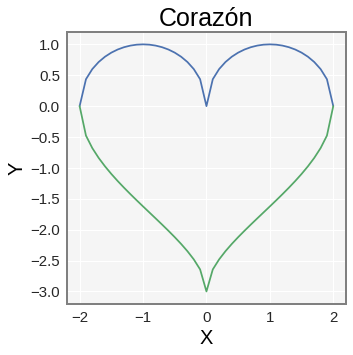

In [0]:
x=np.linspace(-2, 2, num=41)
f=np.array([np.sqrt((1-(np.abs(x_i)-1)**2)) for x_i in x])
g=np.array([-3*np.sqrt(1-np.sqrt(np.abs(x_i)/2)) for x_i in x])

plt.ylabel('Y')
plt.xlabel('X')
plt.title('Corazón')
plt.plot(x,f)
plt.plot(x,g)


Text(0.5,1,'Serie')

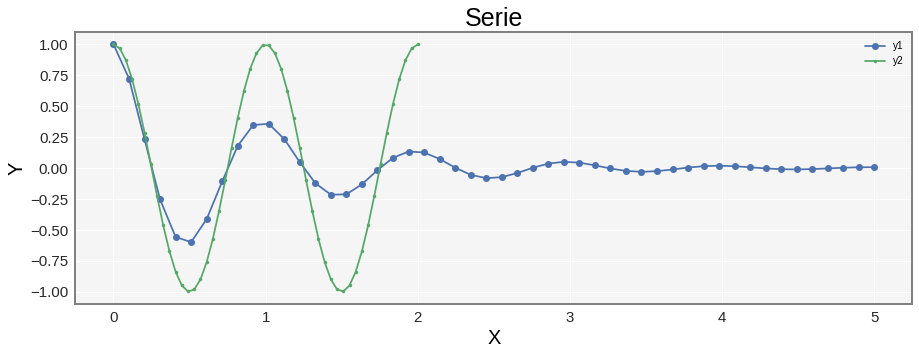

In [0]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure(1, (15, 5))
plt.plot(x1, y1, 'o-', label='y1')
plt.plot(x2, y2, '.-', label='y2')
plt.legend(loc=0)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Serie')